# Edge detection: An evaluation of different operators

## Introduction

Edge detection is a method of processing images, used in computer vision, in order to find the boundaries of objects within the image. In this report I will be evaluating the effectiveness of different edge detection operators. The operators detect edges via discrete differentiation giving an approximation of the gradient of the image intensity of a pixel. From this we can also calculate the direction of the gradient which is then compared to the gradient directions of the pixels around it to determine if the pixel is part of an edge. This is because gradient direction is normal to edges. In particular, I will be considering the Roberts, Sobel, Prewitt and Canny edge detection operators. I will be comparing them using various images created by me and general-purpose images provided in the skimage module of python. The criteria I will be comparing  the operators on are: accuracy, susceptibility to noise and execution time. The gradient of the image intensity function ($G$) and it's direction ($\Theta$) can be calculated using the following equations[1]:

$$
G = \sqrt{G_{x}^{2} + G_{y}^{2}}
$$

$$
\Theta = arctan(\frac{G_{y}}{G_{x}})
$$

## Methods

First some quick setup code and a brief outline of each of the operators[2]:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import feature
#importing Canny operator
from skimage.data import camera, astronaut
from skimage.util import random_noise
from skimage.filters import roberts, sobel, prewitt
# Importing the Operators and Images as well as some modules to compute and display the images

### The Sobel Operator

The Sobel operator is a discrete differential operator thst computes approximations for the gradient of the image intensity function. It does this by convolving two $3x3$ kernels with an image, one kernel representing vertical approximations and the other representing horizontal approximations. If we define $A$ as a source image, the computations are as follows[3]:
$$
G_{x} =  \begin{bmatrix}   
   -1 & 0 & 1 \\
   -2 & 0 & 2 \\
   -1 & 0 & 1
  \end{bmatrix} * A
$$

$$
G_{y} = \begin{bmatrix}
    -1 & -2 & -1 \\
    0 & 0 & 0 \\
    1 & 2 & 1
   \end{bmatrix} * A 
$$

where $*$ denotes a convolution operation.


### The Roberts Operator

The Roberts operator is also a discrete differential operator which approximates gradients through the use of kernels. However the kernels used as well as the formula used to calculate the direction of the gradient are different. They are as follows[4]:

$$
G_{x} = \begin{bmatrix}
    1 & 0 \\
    0 & -1
   \end{bmatrix} * A
$$

$$
G_{y} = \begin{bmatrix}
     0 & 1 \\
    -1 & 0
   \end{bmatrix} * A
$$

$$
\Theta = arctan(\frac{G_{y}}{G_{x}}) - \frac{3\pi}{4}
$$

The results of this operation will highlight changes in intensity in a diagonal direction.

### The Prewitt Operator

The Prewitt operator calculates the gradient of the image intensity at each point, giving the direction of the largest possible increase from light to dark and the rate of change in that direction. The result therefore shows how "abruptly" or "smoothly" the image changes at that point, and therefore how likely it is that part of the image represents an edge, as well as how that edge is likely to be oriented. Like the Sobel operator, the Prewitt operator makes use $3x3$ kernels to approximate the gradient of image intensity however the the direction of the gradient is calculated slightly differently[5]:

$$
G_{x} =  \begin{bmatrix}   
   1 & 0 & -1 \\
   1 & 0 & -1 \\
   1 & 0 & -1
  \end{bmatrix} * A
$$

$$
G_{y} = \begin{bmatrix}
    1 & 1 & 1 \\
    0 & 0 & 0 \\
    -1 & -1 & -1
   \end{bmatrix} * A 
$$

$$
\Theta = arctan2(\frac{G_{y}}{G_{x}})
$$

### The Canny Operator

The Canny operator functions in a 4 step process, of which the first step is to reduce noise using a gaussian filter. Secondly, apply the vertical and horizontal Sobel kernals to calculate the gradient of the image intensity and it's direction. After calculating the gradient magnitude and direction, a full scan of the image is done to remove any unwanted pixels which may not constitute an edge. This is done by checking every pixel if it is a local maximum in its neighborhood in the direction of gradient. If a pixel is not a local maximum it is set to zero producing a binary image with thin edges. This is known as non-maximum suppression. Finally, perform a hysterisis thresholding to confirm if the percieved edges are actual edges. This involves setting a maximum intensity gradient value and a minimum intensity gradient value. Any percieved edges above the maximum value are considered definite edges and any below the minimum value are discarded. Edges which fall in between minimum and maximum and judged based on their connectivity. If the edge is connected to a definite edge pixel then it is also considered a valid edge, if not, the edge is discarded[6].  

I will be applying these operators to multiple images like so:

Canny operator execution time =
118 ms ± 16.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Roberts operator execution time =
18.9 ms ± 5.32 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Sobel operator execution time =
30 ms ± 9.71 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Prewitt operator execution time =
30.4 ms ± 16.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)




<IPython.core.display.Javascript object>


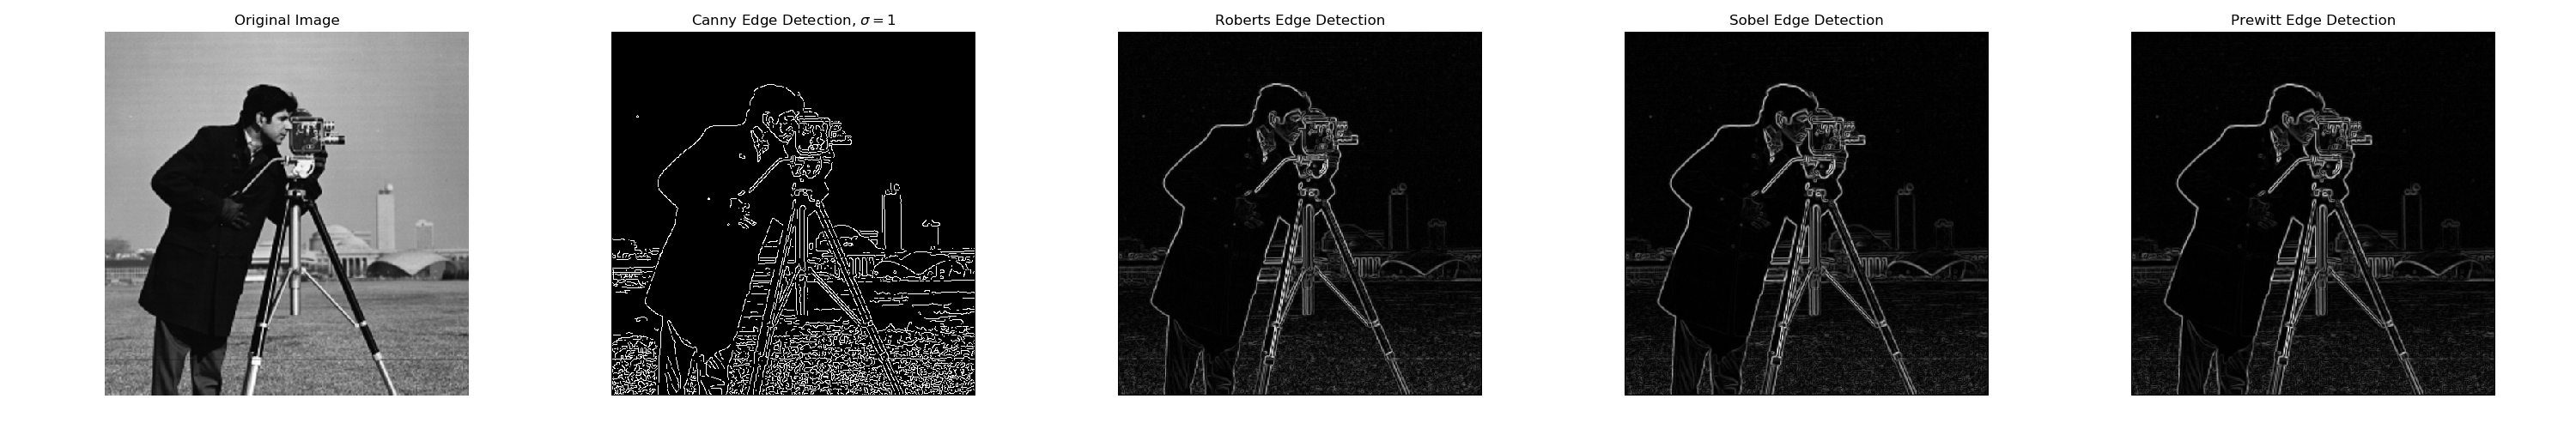

In [2]:
%matplotlib notebook

#loading a general purpose image from the skimage module
test_img = camera()

#Applying the operators to the test image and printing each operators execution time

canny_test = feature.canny(test_img, sigma=1) #sigma is used to denote the standard deviation of the gaussian filter used in the canny operator
print('Canny operator execution time =')
%timeit feature.canny(test_img, sigma=1)
print('\n')

rob_test = roberts(test_img)
print('Roberts operator execution time =')
%timeit roberts(test_img)
print('\n')

sob_test = sobel(test_img)
print('Sobel operator execution time =')
%timeit sobel(test_img)
print('\n')

pre_test = prewitt(test_img)
print('Prewitt operator execution time =')
%timeit prewitt(test_img)
print('\n')
#function used to create a subplot to display the images
fig, ax = plt.subplots(ncols=5, sharex=True, sharey=True,
                       figsize=(30, 5))


ax[0].imshow(test_img, cmap=plt.cm.gray)
ax[0].set_title('Original Image')


ax[1].imshow(canny_test, cmap=plt.cm.gray)
ax[1].set_title('Canny Edge Detection, $\sigma=1$')



ax[2].imshow(rob_test, cmap=plt.cm.gray)
ax[2].set_title('Roberts Edge Detection')


ax[3].imshow(sob_test, cmap=plt.cm.gray)
ax[3].set_title('Sobel Edge Detection')


ax[4].imshow(pre_test, cmap=plt.cm.gray)
ax[4].set_title('Prewitt Edge Detection')

#loop used to remove the axes from the graphs for presentation purposes
for a in ax:
    a.axis('off')

fig.tight_layout()

plt.show()

## Results

First, lets apply the operators to a simple square binary image:

Canny operator execution time =
4.41 ms ± 300 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Roberts operator execution time =
1.02 ms ± 104 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Sobel operator execution time =
1.02 ms ± 134 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Prewitt operator execution time =
907 µs ± 238 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)




<IPython.core.display.Javascript object>


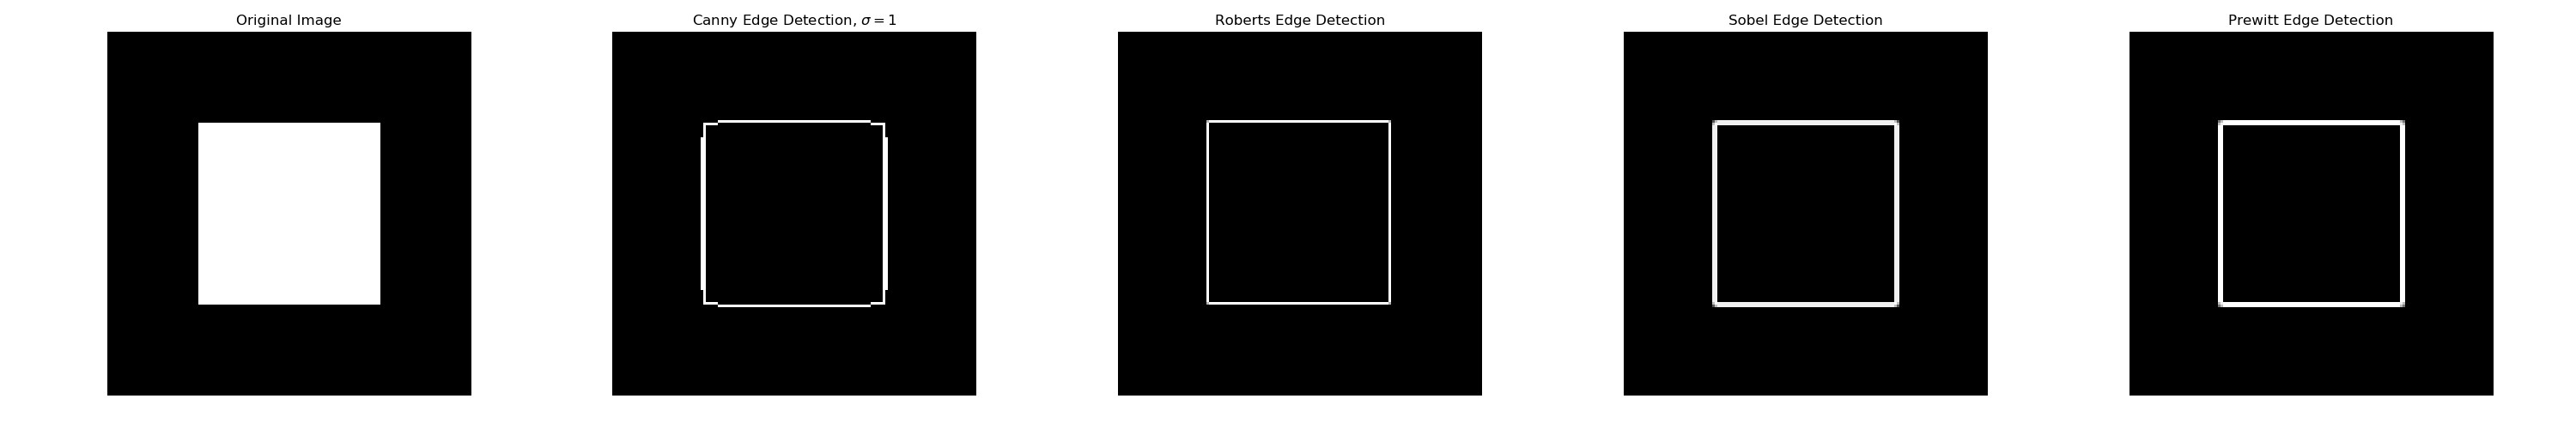

In [3]:

#Generate image of a square
img = np.zeros((128, 128))
img[32:-32, 32:-32] = 1


#Applying the operators to the test image and printing each operators execution time

canny_test = feature.canny(img, sigma=1) #sigma is used to denote the standard deviation of the gaussian filter used in the canny operator
print('Canny operator execution time =')
%timeit feature.canny(img, sigma=1)
print('\n')

rob_test = roberts(img)
print('Roberts operator execution time =')
%timeit roberts(img)
print('\n')

sob_test = sobel(img)
print('Sobel operator execution time =')
%timeit sobel(img)
print('\n')

pre_test = prewitt(img)
print('Prewitt operator execution time =')
%timeit prewitt(img)
print('\n')

#function used to create a subplot to display the images
fig, ax = plt.subplots(ncols=5, sharex=True, sharey=True,
                       figsize=(30, 5))


ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original Image')


ax[1].imshow(canny_test, cmap=plt.cm.gray)
ax[1].set_title('Canny Edge Detection, $\sigma=1$')



ax[2].imshow(rob_test, cmap=plt.cm.gray)
ax[2].set_title('Roberts Edge Detection')


ax[3].imshow(sob_test, cmap=plt.cm.gray)
ax[3].set_title('Sobel Edge Detection')


ax[4].imshow(pre_test, cmap=plt.cm.gray)
ax[4].set_title('Prewitt Edge Detection')

#loop used to remove the axes from the graphs for presentation purposes
for a in ax:
    a.axis('off')

fig.tight_layout()

plt.show()

All the operators seem to accurately find the edges of the square, however the Canny operator produced some strange, almost curved edges and the Robert edge detector produced edges of thinner lines than the Sobel and Prewitt operators which produced virtually identical edges. Understandably, the Canny operator took the longest and the Roberts operator was the fastest. The Prewitt operator was also slower than the Sobel operator. Next I will apply noise to the image:

Canny operator execution time =
6.56 ms ± 137 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Roberts operator execution time =
629 µs ± 33.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Sobel operator execution time =
1 ms ± 261 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Prewitt operator execution time =
952 µs ± 115 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)




<IPython.core.display.Javascript object>


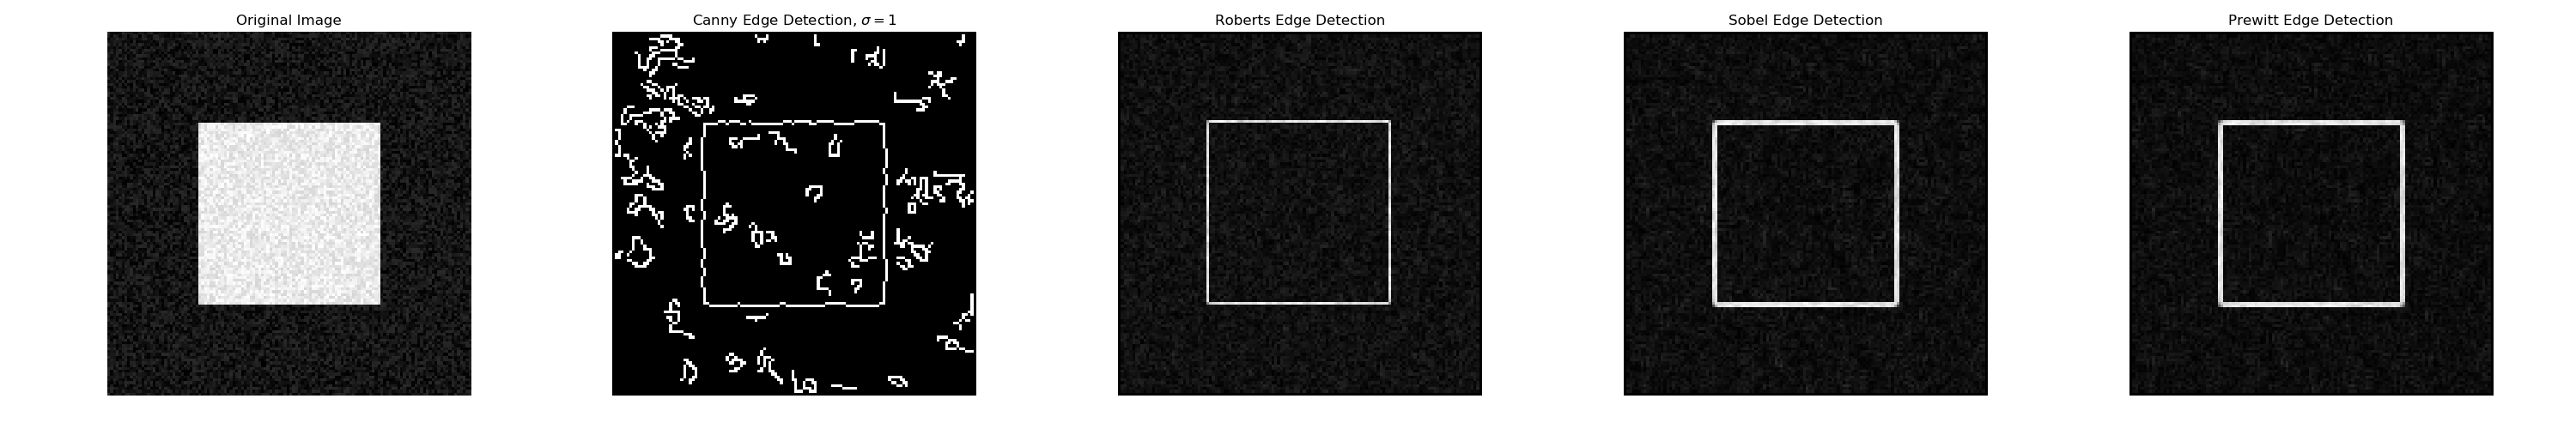

In [4]:
#Generate noisy image of a square
img = np.zeros((128, 128))
img[32:-32, 32:-32] = 1
#add noise pixels to the image
img += 0.2 * np.random.random(img.shape)

#Applying the operators to the test image and printing each operators execution time

canny_test = feature.canny(img, sigma=1) #sigma is used to denote the standard deviation of the gaussian filter used in the canny operator
print('Canny operator execution time =')
%timeit feature.canny(img, sigma=1)
print('\n')

rob_test = roberts(img)
print('Roberts operator execution time =')
%timeit roberts(img)
print('\n')

sob_test = sobel(img)
print('Sobel operator execution time =')
%timeit sobel(img)
print('\n')

pre_test = prewitt(img)
print('Prewitt operator execution time =')
%timeit prewitt(img)
print('\n')

#function used to create a subplot to display the images
fig, ax = plt.subplots(ncols=5, sharex=True, sharey=True,
                       figsize=(30, 5))


ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original Image')


ax[1].imshow(canny_test, cmap=plt.cm.gray)
ax[1].set_title('Canny Edge Detection, $\sigma=1$')



ax[2].imshow(rob_test, cmap=plt.cm.gray)
ax[2].set_title('Roberts Edge Detection')


ax[3].imshow(sob_test, cmap=plt.cm.gray)
ax[3].set_title('Sobel Edge Detection')


ax[4].imshow(pre_test, cmap=plt.cm.gray)
ax[4].set_title('Prewitt Edge Detection')

#loop used to remove the axes from the graphs for presentation purposes
for a in ax:
    a.axis('off')

fig.tight_layout()

plt.show()


The canny edge detector has removed some of the noise however the accuracy of it's edges have suffered greatly. The other operators were not able to remove any of the noise however their edges were still accurate. The execution time for each operator increased significantly except the Roberts operator whose execution time actually decreased. To potentially improve the accuracy of the canny operator, I will try can try increasing the standard deviation of the gaussian filter used in the Canny operator:

Canny operator execution time =
5.66 ms ± 71.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<IPython.core.display.Javascript object>


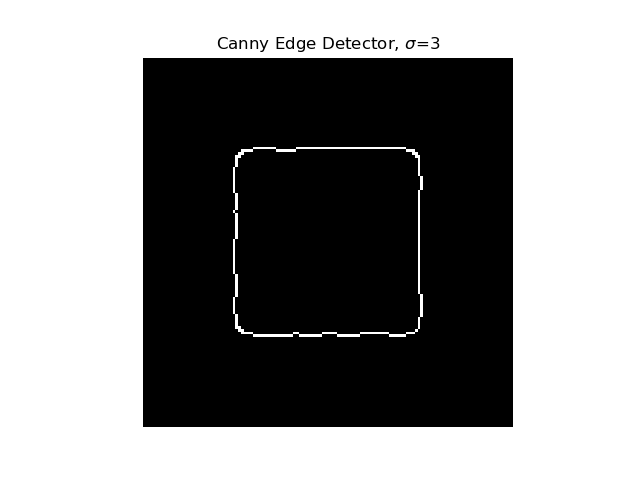

In [5]:
#incresed the standard deviation to 3
canny_test = feature.canny(img, sigma=3)
print('Canny operator execution time =')
%timeit feature.canny(img, sigma=3)

#displaying image
plt.figure()
plt.imshow(canny_test, cmap=plt.cm.gray)
plt.title('Canny Edge Detector, $\sigma$=3')
plt.axis('off')
plt.show()

All of the noise has been removed however the edges still are not very accurate. Lets try amplifying the noise by also adding a gaussian filter to the image. I will also keep the standard deviation of the gaussian filter in the Canny operator as $3$:

Canny operator execution time =
92.5 ms ± 4.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Roberts operator execution time =
19.3 ms ± 2.85 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Sobel operator execution time =
20.4 ms ± 4.99 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Prewitt operator execution time =
722 µs ± 38.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)




<IPython.core.display.Javascript object>


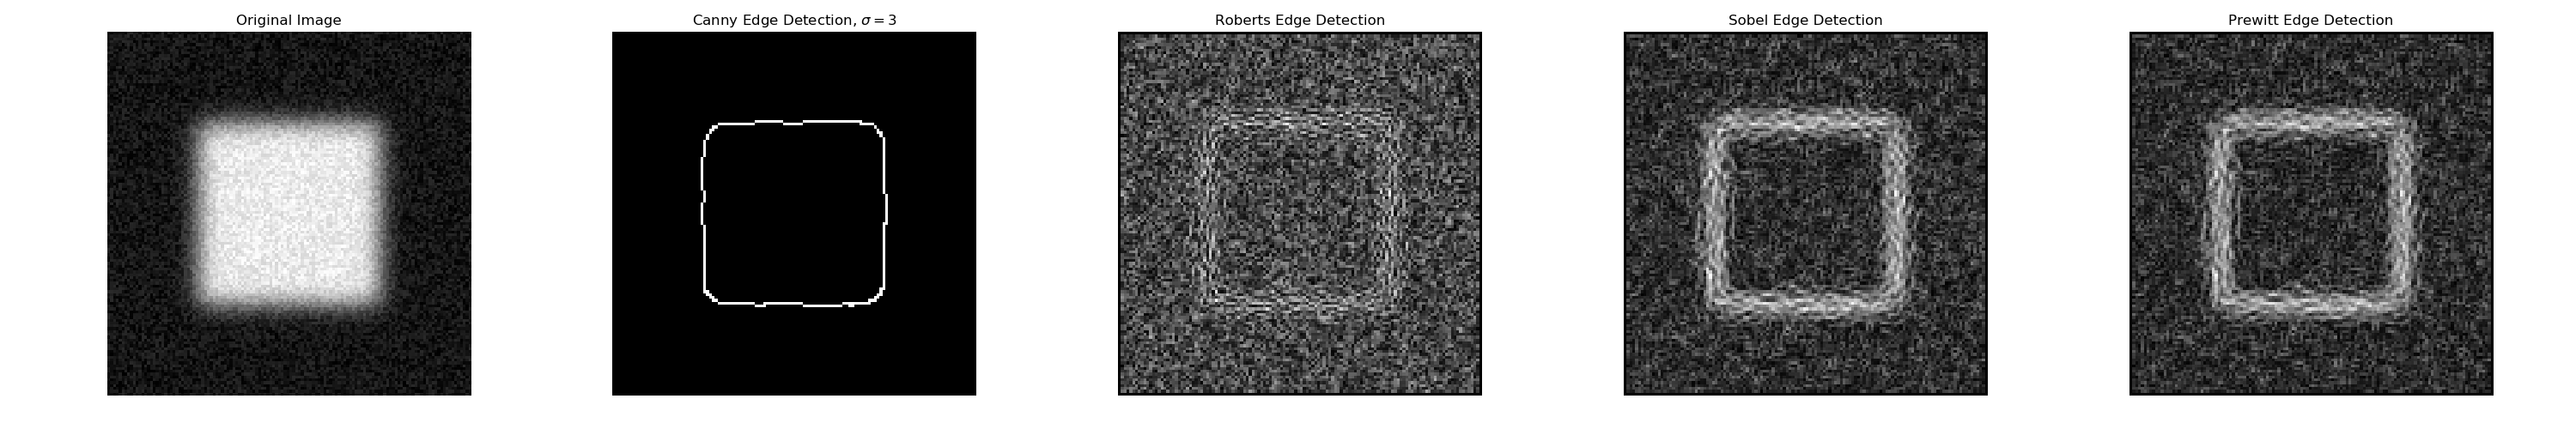

In [6]:
#Generate noisy image of a square
img = np.zeros((128, 128))
img[32:-32, 32:-32] = 1
#Gaussian filter of standard deviation 4 applied + noise pixels
img = ndi.gaussian_filter(img, 4)
img += 0.2 * np.random.random(img.shape)

#Applying the operators to the test image and printing each operators execution time

canny_test = feature.canny(img, sigma=3) #sigma is used to denote the standard deviation of the gaussian filter used in the canny operator
print('Canny operator execution time =')
%timeit feature.canny(test_img, sigma=3)
print('\n')

rob_test = roberts(img)
print('Roberts operator execution time =')
%timeit roberts(test_img)
print('\n')

sob_test = sobel(img)
print('Sobel operator execution time =')
%timeit sobel(test_img)
print('\n')

pre_test = prewitt(img)
print('Prewitt operator execution time =')
%timeit prewitt(img)
print('\n')

#function used to create a subplot to display the images
fig, ax = plt.subplots(ncols=5, sharex=True, sharey=True,
                       figsize=(30, 5))


ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original Image')


ax[1].imshow(canny_test, cmap=plt.cm.gray)
ax[1].set_title('Canny Edge Detection, $\sigma=3$')



ax[2].imshow(rob_test, cmap=plt.cm.gray)
ax[2].set_title('Roberts Edge Detection')


ax[3].imshow(sob_test, cmap=plt.cm.gray)
ax[3].set_title('Sobel Edge Detection')


ax[4].imshow(pre_test, cmap=plt.cm.gray)
ax[4].set_title('Prewitt Edge Detection')

#loop used to remove the axes from the graphs for presentation purposes
for a in ax:
    a.axis('off')

fig.tight_layout()

plt.show()

The Canny operator was unaffected by the gaussian filter and completely removed the noise yet the edges produced were still inaccurate. However the other operators were massively affected by the gaussian filter and the edges they produced are extremely inaccurate. The Sobel and Prewitt operators still have recognisable edges however the Robetrts operator edges are almost indistinguishable from the noise. The Sobel operator produced nearly identical edges to the Prewitt operator once again however this time its seems the edges produced by the Sobel operator are slightly brighter. The Canny operator is still the slowest operator however the Prewitt operator is now the fastest by a large margin. Now lets run the same tests but this time with an actual image. Note that the array corresponding to the image has been split. This is because the operators from skimage only work with two dimensional arrays. Most images produce the three dimensional arrays, the first two corresponding to the resolution of the image and the third corresponding to the layers of colour of the image.

Canny operator execution time =
97.8 ms ± 18.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Roberts operator execution time =
16.4 ms ± 1.88 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Sobel operator execution time =
22.1 ms ± 4.75 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Prewitt operator execution time =
24.8 ms ± 4.55 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)




<IPython.core.display.Javascript object>


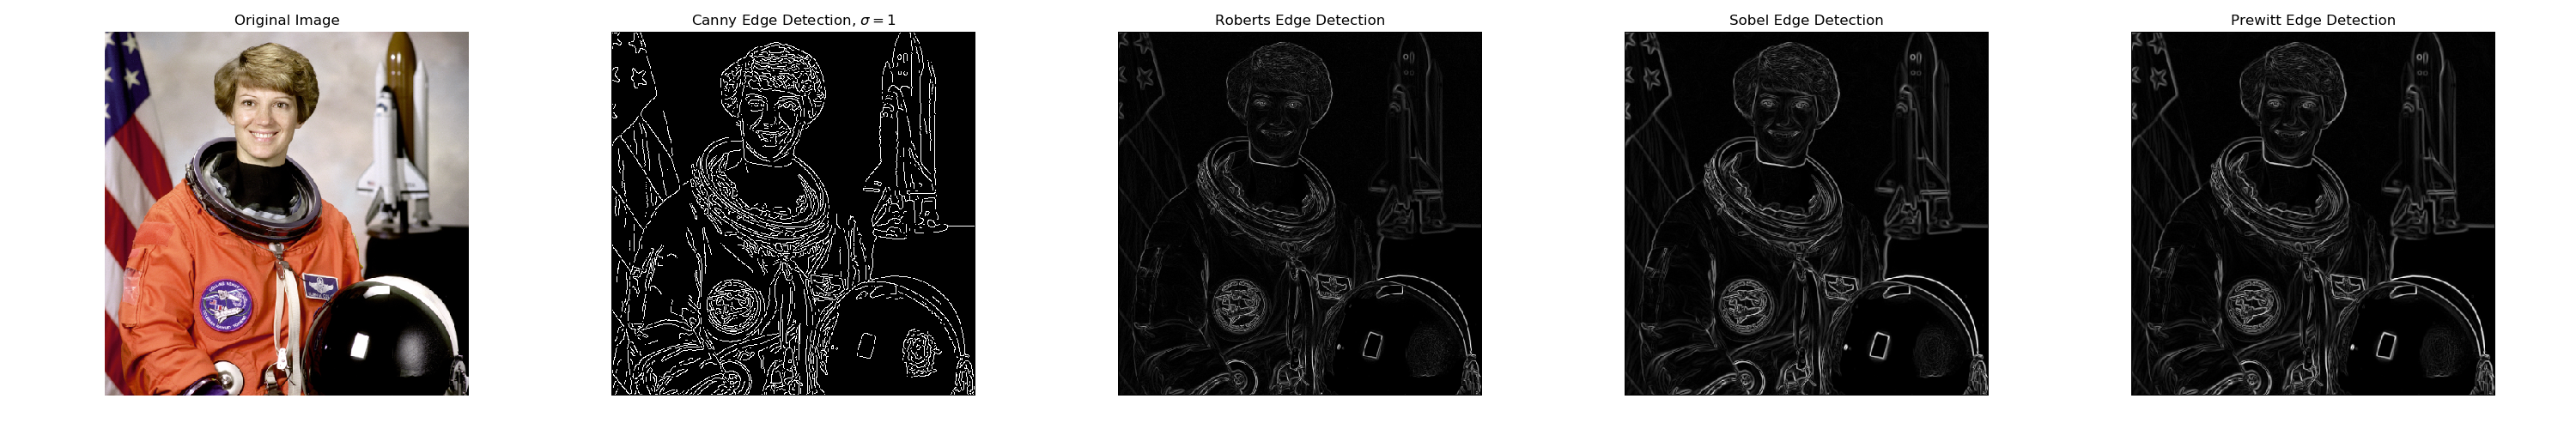

In [7]:
#loading general purpose image from skimage module
img = astronaut()

#Applying the operators to the test image and printing each operators execution time

canny_test = feature.canny(img[:,:,0], sigma=1) #sigma is used to denote the standard deviation of the gaussian filter used in the canny operator
print('Canny operator execution time =')
%timeit feature.canny(img[:,:,0], sigma=1)
print('\n')

rob_test = roberts(img[:,:,0])
print('Roberts operator execution time =')
%timeit roberts(img[:,:,0])
print('\n')

sob_test = sobel(img[:,:,0])
print('Sobel operator execution time =')
%timeit sobel(img[:,:,0])
print('\n')

pre_test = prewitt(img[:,:,0])
print('Prewitt operator execution time =')
%timeit prewitt(img[:,:,0])
print('\n')

#function used to create a subplot to display the images
fig, ax = plt.subplots(ncols=5, sharex=True, sharey=True,
                       figsize=(30, 5))


ax[0].imshow(img)
ax[0].set_title('Original Image')


ax[1].imshow(canny_test, cmap=plt.cm.gray)
ax[1].set_title('Canny Edge Detection, $\sigma=1$')



ax[2].imshow(rob_test, cmap=plt.cm.gray)
ax[2].set_title('Roberts Edge Detection')


ax[3].imshow(sob_test, cmap=plt.cm.gray)
ax[3].set_title('Sobel Edge Detection')


ax[4].imshow(pre_test, cmap=plt.cm.gray)
ax[4].set_title('Prewitt Edge Detection')

#loop used to remove the axes from the graphs for presentation purposes
for a in ax:
    a.axis('off')

fig.tight_layout()

plt.show()


All the operators are accurate as expected. The sobel and Prewitt operators are virtually identical once more and the Roberts operator still produces thinner lines than them. The execution times are understandably greater however the Roberts operator is now the fastest once more. Note that the standard deviation for the gaussian filter in the canny operator has been set to one again. This is due to the fact that without noise higher standard deviations will cause the operator to discard valid edges as shown below:

Canny operator execution time =
95.9 ms ± 10.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<IPython.core.display.Javascript object>


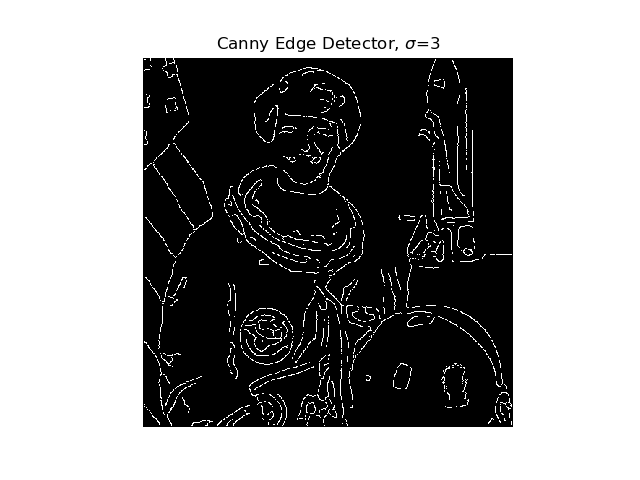

In [8]:
img = astronaut()
#incresed the standard deviation to 3
canny_test = feature.canny(img[:,:,0], sigma=3)
print('Canny operator execution time =')
%timeit feature.canny(img[:,:,0], sigma=3)

#displaying image
plt.figure()
plt.imshow(canny_test, cmap=plt.cm.gray)
plt.title('Canny Edge Detector, $\sigma$=3')
plt.axis('off')
plt.show()

Next we add noise to the image:

Canny operator execution time =
116 ms ± 22.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Roberts operator execution time =
13.4 ms ± 2.42 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Sobel operator execution time =
15.2 ms ± 1.63 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Prewitt operator execution time =
15.8 ms ± 2.15 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)




<IPython.core.display.Javascript object>


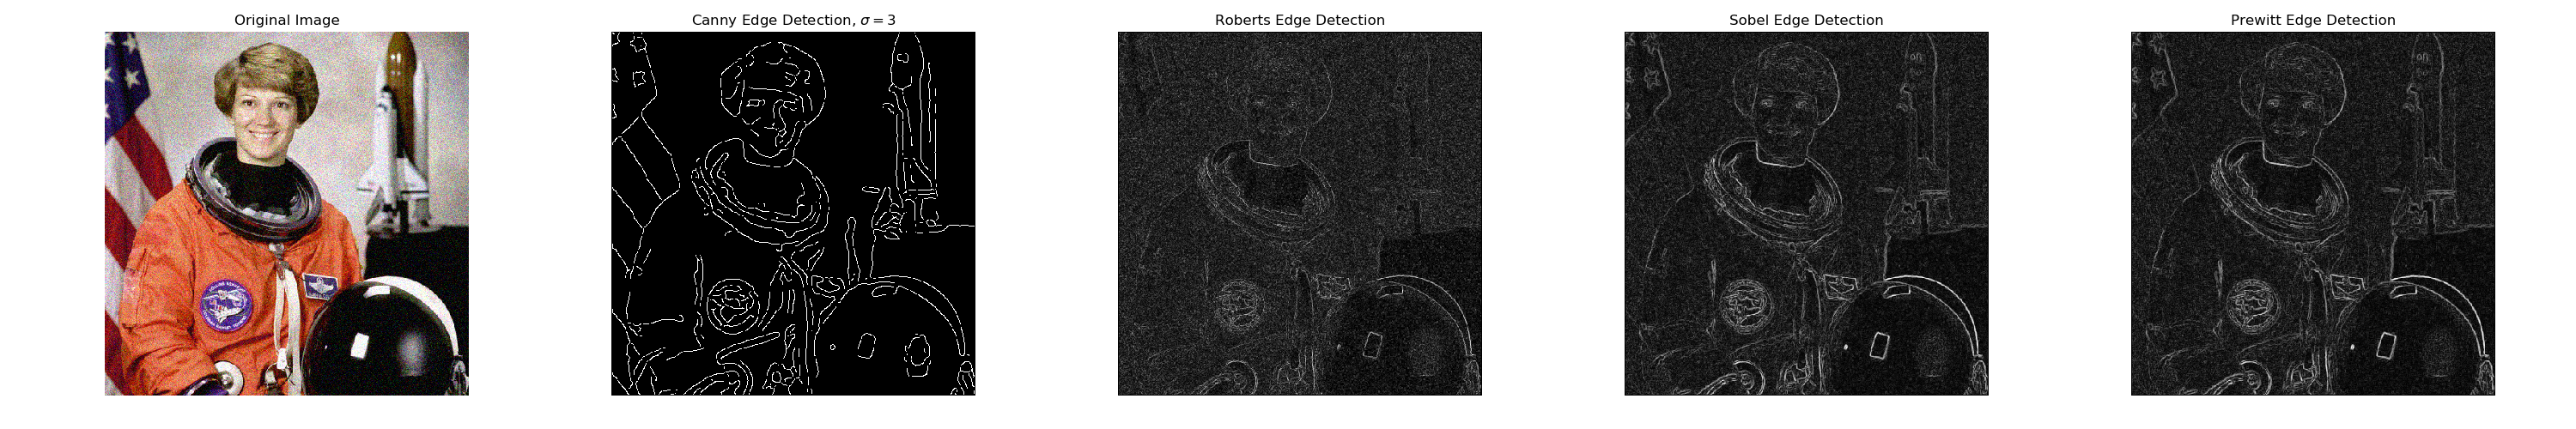

In [9]:
#adding noise to astronaut()
img = astronaut()
img = random_noise(astronaut())
#Applying the operators to the test image and printing each operators execution time

canny_test = feature.canny(img[:,:,0], sigma=3) #sigma is used to denote the standard deviation of the gaussian filter used in the canny operator
print('Canny operator execution time =')
%timeit feature.canny(img[:,:,0], sigma=3)
print('\n')

rob_test = roberts(img[:,:,0])
print('Roberts operator execution time =')
%timeit roberts(img[:,:,0])
print('\n')

sob_test = sobel(img[:,:,0])
print('Sobel operator execution time =')
%timeit sobel(img[:,:,0])
print('\n')

pre_test = prewitt(img[:,:,0])
print('Prewitt operator execution time =')
%timeit prewitt(img[:,:,0])
print('\n')

#function used to create a subplot to display the images
fig, ax = plt.subplots(ncols=5, sharex=True, sharey=True,
                       figsize=(30, 5))


ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original Image')


ax[1].imshow(canny_test, cmap=plt.cm.gray)
ax[1].set_title('Canny Edge Detection, $\sigma=3$')



ax[2].imshow(rob_test, cmap=plt.cm.gray)
ax[2].set_title('Roberts Edge Detection')


ax[3].imshow(sob_test, cmap=plt.cm.gray)
ax[3].set_title('Sobel Edge Detection')


ax[4].imshow(pre_test, cmap=plt.cm.gray)
ax[4].set_title('Prewitt Edge Detection')

#loop used to remove the axes from the graphs for presentation purposes
for a in ax:
    a.axis('off')

fig.tight_layout()

plt.show()

The noise, as expected, caused a sharp decrease in the accuracy of all the operators. Even with the noise, the canny operator seems to have discarded valid edges; most likely due to the standard deviation of the operators gaussian filter being set too high. The Roberts operator seems to have been affected the most as the image is barely recognisable and the noise is far more noticable. The Sobel and Prewitt operators have also been greatly affected by the noise however not to the same extent as the Roberts operator. Also, the execution times of the operators is unexpectedly faster than applying the operators without noise, the exception being the canny operator which is slower than applying it without noise. To ensure the canny operator's inaccuracy is due to it's standard deviation being set too high, we will test it again with a standard deviation of $2$: 

Canny operator execution time =
113 ms ± 14.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<IPython.core.display.Javascript object>


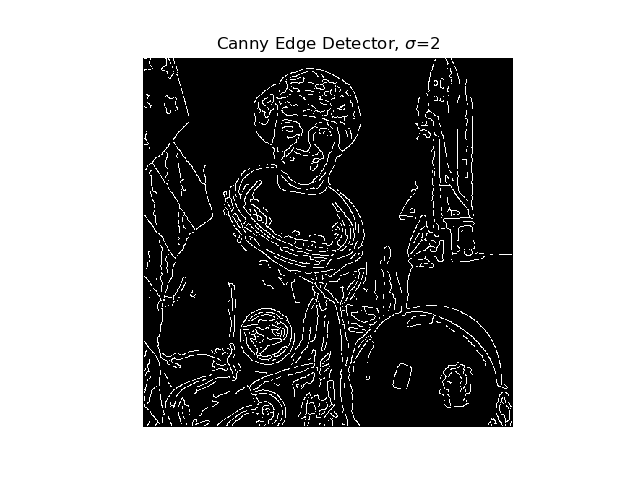

In [10]:
img = astronaut()
img = random_noise(astronaut())
#decresed the standard deviation to 2
canny_test = feature.canny(img[:,:,0], sigma=2)
print('Canny operator execution time =')
%timeit feature.canny(img[:,:,0], sigma=2)

#displaying image
plt.figure()
plt.imshow(canny_test, cmap=plt.cm.gray)
plt.title('Canny Edge Detector, $\sigma$=2')
plt.axis('off')
plt.show()

The canny operator set to a standard deviation of 2 is far more accurate. Next, lets apply a gaussian filter to the image:

Canny operator execution time =
96.8 ms ± 20.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Roberts operator execution time =
16.8 ms ± 3.05 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Sobel operator execution time =
19.6 ms ± 2.61 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Prewitt operator execution time =
18.1 ms ± 2.31 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)




<IPython.core.display.Javascript object>


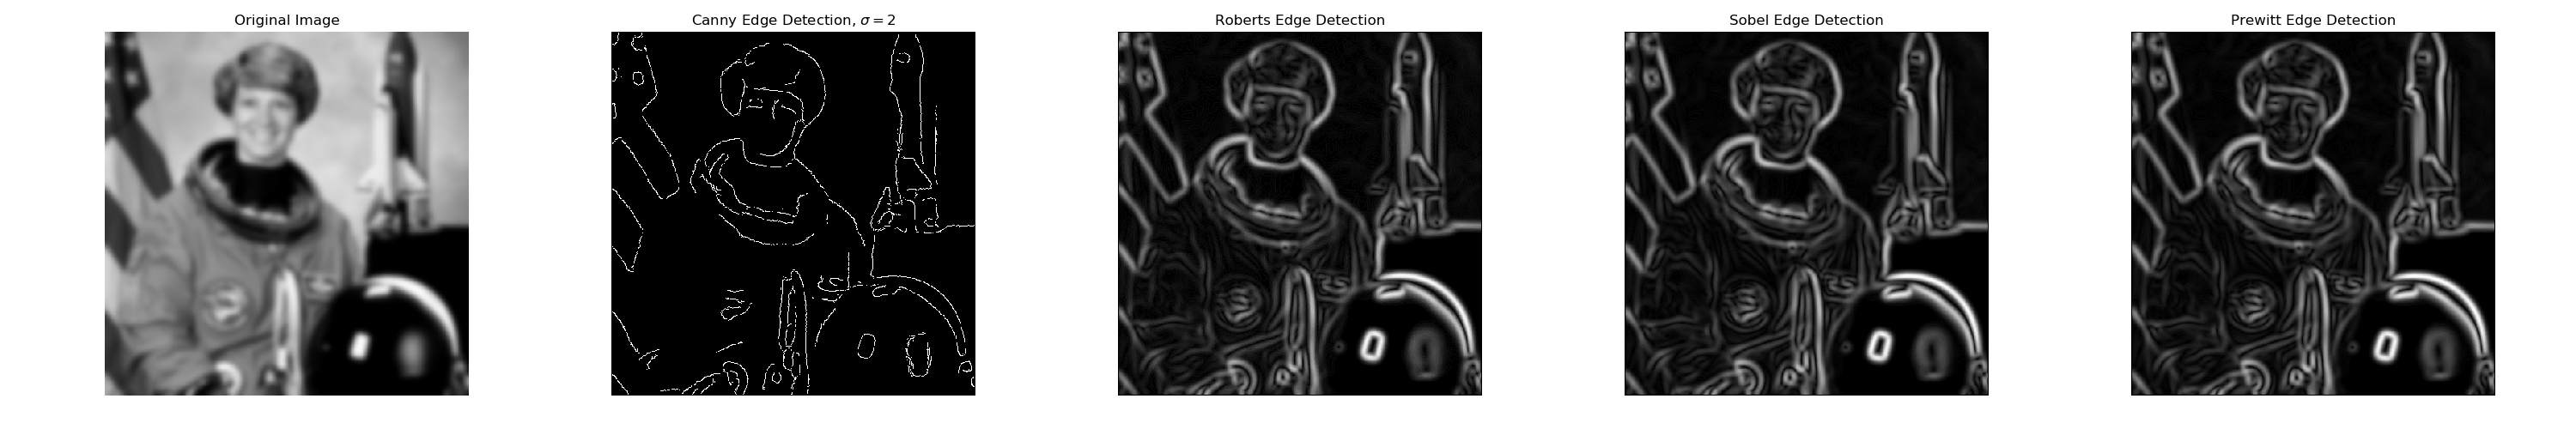

In [11]:
#adding noise pixels + gaussian filter of standard deviation 4 to astronaut() image
img = astronaut()

img = ndi.gaussian_filter(img, 4)
#Applying the operators to the test image and printing each operators execution time

canny_test = feature.canny(img[:,:,0], sigma=2) #sigma is used to denote the standard deviation of the gaussian filter used in the canny operator
print('Canny operator execution time =')
%timeit feature.canny(img[:,:,0], sigma=2)
print('\n')

rob_test = roberts(img[:,:,0])
print('Roberts operator execution time =')
%timeit roberts(img[:,:,0])
print('\n')

sob_test = sobel(img[:,:,0])
print('Sobel operator execution time =')
%timeit sobel(img[:,:,0])
print('\n')

pre_test = prewitt(img[:,:,0])
print('Prewitt operator execution time =')
%timeit prewitt(img[:,:,0])
print('\n')

#function used to create a subplot to display the images
fig, ax = plt.subplots(ncols=5, sharex=True, sharey=True,
                       figsize=(30, 5))


ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original Image')


ax[1].imshow(canny_test, cmap=plt.cm.gray)
ax[1].set_title('Canny Edge Detection, $\sigma=2$')



ax[2].imshow(rob_test, cmap=plt.cm.gray)
ax[2].set_title('Roberts Edge Detection')


ax[3].imshow(sob_test, cmap=plt.cm.gray)
ax[3].set_title('Sobel Edge Detection')


ax[4].imshow(pre_test, cmap=plt.cm.gray)
ax[4].set_title('Prewitt Edge Detection')

#loop used to remove the axes from the graphs for presentation purposes
for a in ax:
    a.axis('off')

fig.tight_layout()

plt.show()

The operators all produced inaccurate results. The canny operator, despite producing clear edges, still discarded valid edges even though it's standard deviation is set to $2$. The Roberts, Sobel and Prewitt operators produced practically idential edges which are both inaccurate and noisy however they seem less affected than when they were applied to an image with no gaussian filter and just random noise. Interestingly the execution time for each operator decreased even further. Finally we will compare the operators on a low contrast, high frequency image:

Canny operator execution time =
193 ms ± 23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Roberts operator execution time =
27.6 ms ± 8.34 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Sobel operator execution time =
25.2 ms ± 639 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Prewitt operator execution time =
26.2 ms ± 1.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)




<IPython.core.display.Javascript object>


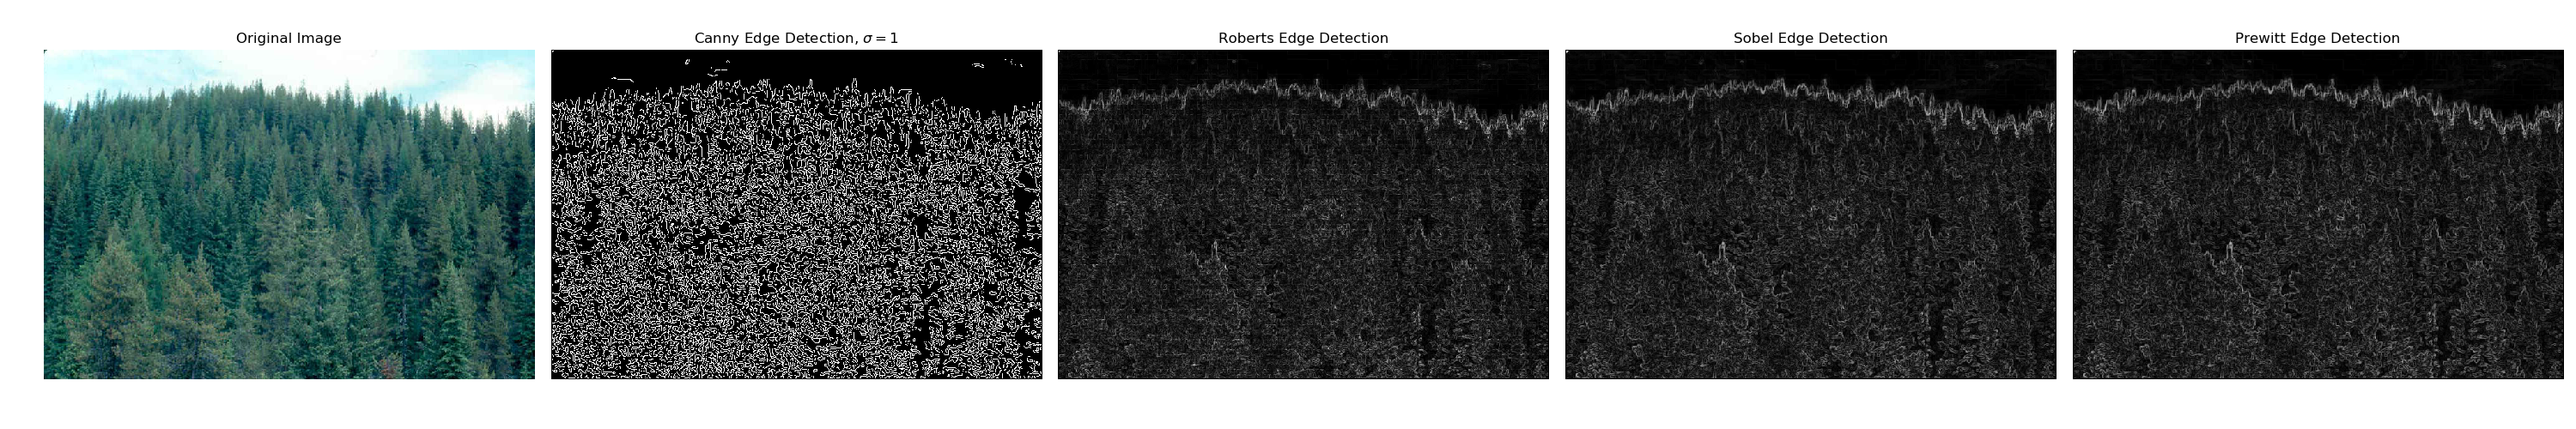

In [12]:
#loading image
img = plt.imread('low_contrast.jpg')

#Applying the operators to the test image and printing each operators execution time

canny_test = feature.canny(img[:,:,0], sigma=1) #sigma is used to denote the standard deviation of the gaussian filter used in the canny operator
print('Canny operator execution time =')
%timeit feature.canny(img[:,:,0], sigma=1)
print('\n')

rob_test = roberts(img[:,:,0])
print('Roberts operator execution time =')
%timeit roberts(img[:,:,0])
print('\n')

sob_test = sobel(img[:,:,0])
print('Sobel operator execution time =')
%timeit sobel(img[:,:,0])
print('\n')

pre_test = prewitt(img[:,:,0])
print('Prewitt operator execution time =')
%timeit prewitt(img[:,:,0])
print('\n')

#function used to create a subplot to display the images
fig, ax = plt.subplots(ncols=5, sharex=True, sharey=True,
                       figsize=(30, 5))


ax[0].imshow(img)
ax[0].set_title('Original Image')


ax[1].imshow(canny_test, cmap=plt.cm.gray)
ax[1].set_title('Canny Edge Detection, $\sigma=1$')



ax[2].imshow(rob_test, cmap=plt.cm.gray)
ax[2].set_title('Roberts Edge Detection')


ax[3].imshow(sob_test, cmap=plt.cm.gray)
ax[3].set_title('Sobel Edge Detection')


ax[4].imshow(pre_test, cmap=plt.cm.gray)
ax[4].set_title('Prewitt Edge Detection')

#loop used to remove the axes from the graphs for presentation purposes
for a in ax:
    a.axis('off')

fig.tight_layout()

plt.show()


All of the operators are highly inaccurate. The canny operator seems to detect the trees in the image similarly to how it detects noise and is unable to produce intelligible edges. The other operators produce visible edges espicially at the top of the image however it's still difficult to make out the original image. 

## Discussion

All of the operators seem to be highly applicable to normal images. However, none of the operators seem to be appliacble to low contrast and high frequency images. This could be due to the operators not being sophisticated enough to effectively distinguish the edges in high frequency and low contrast images. The canny operator is the most effective operator due to being the most accurate operator in almost every instance, producing pixel width edges and a binary image. This is due to it's more complex algorithm involving non-maximum suppression and hysteresis thresholding. The Sobel, Prewitt and Roberts operators, whilst applicable, seem to be unable to effectively deal with any type of noise where as the canny operator is easily able to remove noise depending on the standard deviation set for it's gaussian filter. The canny operator is the slowest operator in every instance, the Sobel operator is the second slowest operator, the Prewitt operator is only slightly faster than the Sobel operator and the Roberts operator is the fastest on average. There was one instance where the Prewitt operator was faster than the Roberts operator, this was when a gaussian image and noise pixels were applied to a binary image of a square. In addition to being quicker, the Prewitt operator also produced a far more accurate image in that instance, as did the Sobel operator. This shows that the Roberts operator is more susceptible to noise than the Prewitt and Sobel operators. In the same instance, the Prewitt operator and Sobel operator produced almost identical edges however the Prewitt operator produced it's edges orders of magnitude faster than the Sobel operator. However, it seeems the Sobel operator had slightly better spectral response as it produced slightly brighter edges which is closer to the original image however it's too slight to be conclusive hence further research is required. In the instance of the astronaut image with noise pixels added, the Roberts operator barely produced edges compared to the other operators. This shows that the Roberts operator is the most susceptible to noise, most likely due to the fact that it's the simplest operator, only using $2x2$ kernels. In the Instance of the astronaut image with a gaussian filter the Canny operator discarded valid edges even though it's standard deviation was set to $2$. This is possibly due to the image being in grayscale with a gaussian filter which r=greatly reduced the contrast in the image leading the Canny operator to ignore valid edges.   

## Conclusion

From the results above, we can conclude that the most effective and applicable operator is the Canny operator. This is because on average it's the most accurate operator and is able to effectively deal with different types of noise. Whilst it is the slowest in terms of execution time, this is a small price to pay for how much more functional it is compared to the other operators. The next best would be the Prewitt operator due to it's great accuracy with normal images and decent accuracy with noisy images which are on par with the Sobel operator. However, the Prewitt operator was shown to be faster than the sobel operator in every instance, leaving the Sobel operator as the third most effective. The Roberts operator is the worst even though it's the fastet operator and produces thinner edges than the Sobel and Prewitt operators. This is due to it's complete inability to deal with noise which stems from it's simple algorithm. Further research could be done into more sophisticated operators that can detect edges in high frequency, low contrast images as none of the operators I tested were suitable for those images. Some research could also be put into the possibly better spectral response of the Sobel operator when compared to the Prewitt and Roberts operators.  

## References

[[1](http://homepages.inf.ed.ac.uk/rbf/HIPR2/featops.htm)] - Image processing learning resources, HIPR2, Time and date of access: 17:31, 05/01/2019

[[2](https://scikit-image.org/)] - Scikit-image module index, Time and date accessed: 17:50, 05/01/2019

[[3](http://homepages.inf.ed.ac.uk/rbf/HIPR2/sobel.htm)] - HIPR2, feature detectors, Sobel Edge Detector, Time and date of access: 17:31, 05/01/2019

[[4](http://homepages.inf.ed.ac.uk/rbf/HIPR2/roberts.htm)] - HIPR2, feature detectors, Robert Cross Edge Detector, Time and date of access: 17:31, 05/01/2019

[5] - Dim, Jules R.; Takamura, Tamio (2013-12-11). "Alternative Approach for Satellite Cloud Classification: Edge Gradient Application". Advances in Meteorology. 2013

[[6](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html)] - OpenCV Canny edge detector turotial Time and date of access: 17:57, 05/01/2019